In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# from sklearn.compose import  ColumnTransformer
from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import  StandardScaler
# from sklearn.decomposition import PCA
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.model_selection import  GridSearchCV,StratifiedShuffleSplit,train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge,Lasso,LinearRegression

In [7]:
DATA_PATH = "/content/drive/MyDrive/blm5121-wm-project/data/"

In [9]:
df = pd.read_csv(DATA_PATH + "export.csv")

In [10]:
df.head()

,age,weight_kg,height_m,bmi,body_fat_percent,grip_force,sit_ups_counts,sit_and_bend_forward_m,broad_jump_m,diastolic,systolic,gender,encoded_class
0,27.0,75.24,1.723,25.344179,21.3,54.9,60.0,0.184,2.17,80.0,130.0,True,2
1,25.0,55.80,1.650,20.495868,15.7,36.4,53.0,0.163,2.29,77.0,126.0,True,0
2,31.0,78.00,1.796,24.181428,20.1,44.8,49.0,0.120,1.81,92.0,152.0,True,2
3,32.0,71.10,1.745,23.349562,18.4,41.4,53.0,0.152,2.19,76.0,147.0,True,1
4,28.0,67.70,1.738,22.412439,17.1,43.5,45.0,0.271,2.17,70.0,127.0,True,1


In [11]:
X = df.drop('encoded_class',axis=1)
y = df['encoded_class']

In [31]:
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=42,stratify=y,test_size=.20)

In [33]:
y_train.count()

10713

In [66]:
my_params = [
    {
        # DecisionTreeClassifier
        'min_samples_split':[2,3,5],
        "max_depth":[3,5,7],
    },


    {
        # KNeighborsClassifier
        'n_neighbors':[3,4,5,6],
        "weights":['uniform','distance'],
        "p":[1,2]
    },

    {
        # GaussianNB
        "var_smoothing": [1e-9, 1e-8, 1e-7]
    },
    {
        # Lasso
        # lower alpha --> higher regularistion (treats underfitting)
        'alpha':[0.01,0.1,0.5,1],
        "max_iter":[50,100,1000,1500],
        "warm_start":[True,False],
    },

]

my_cv = StratifiedShuffleSplit(n_splits=5,test_size=.20,random_state=42)

In [48]:
my_params

[{'min_samples_split': [2, 3, 5], 'max_depth': [3, 5, 7]},
 {'n_neighbors': [3, 4, 5, 6],
  'weights': ['uniform', 'distance'],
  'p': [1, 2]},
 {'var_smoothing': [1e-09, 1e-08, 1e-07]}]

In [51]:
def tune_and_predict_classification(model_name, X_train, y_train, X_test, y_test):
    # Model seçimi
    if model_name == 'naive_bayes':
        from sklearn.naive_bayes import GaussianNB
        model = GaussianNB()
        param_grid = my_params[2]

    elif model_name == 'decision_tree':
        from sklearn.tree import DecisionTreeClassifier
        model = DecisionTreeClassifier(random_state=42)
        param_grid = my_params[0]

    elif model_name == 'knn':
        from sklearn.neighbors import KNeighborsClassifier
        model = KNeighborsClassifier(n_jobs=-1)
        param_grid = my_params[1]

    else:
        print("Geçersiz model adı. Lütfen 'naive_bayes', 'decision_tree' veya 'kneighbors' kullanın.")
        return

    # Grid search ve model uyumu
    grid_search = GridSearchCV(model, param_grid, cv=my_cv, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # En iyi parametreler ve performans sonuçları
    print(f"Best parameters for {model_name}:")
    print(grid_search.best_params_)
    print(f"Best score: {grid_search.best_score_}")
    print("\n")

    # Tahminleme
    y_pred = grid_search.predict(X_test)

    # Sınıflandırma raporu
    return (classification_report(y_test, y_pred))

In [53]:
report = tune_and_predict("naive_bayes", X_train, y_train, X_test, y_test)

Best parameters for naive_bayes:
{'var_smoothing': 1e-09}
Best score: 0.5518432104526365




In [55]:
print(report)

              precision    recall  f1-score   support

           0       0.58      0.76      0.66       670
           1       0.40      0.27      0.32       669
           2       0.48      0.45      0.46       670
           3       0.67      0.72      0.69       670

    accuracy                           0.55      2679
   macro avg       0.53      0.55      0.53      2679
weighted avg       0.53      0.55      0.53      2679



In [56]:
y

0        2
1        0
2        2
3        1
4        1
        ..
13387    2
13388    3
13389    0
13390    3
13391    2
Name: encoded_class, Length: 13392, dtype: int64

In [57]:
X

,age,weight_kg,height_m,bmi,body_fat_percent,grip_force,sit_ups_counts,sit_and_bend_forward_m,broad_jump_m,diastolic,systolic,gender
0,27.0,75.24,1.723,25.344179,21.3,54.9,60.0,0.184,2.17,80.0,130.0,True
1,25.0,55.80,1.650,20.495868,15.7,36.4,53.0,0.163,2.29,77.0,126.0,True
2,31.0,78.00,1.796,24.181428,20.1,44.8,49.0,0.120,1.81,92.0,152.0,True
3,32.0,71.10,1.745,23.349562,18.4,41.4,53.0,0.152,2.19,76.0,147.0,True
4,28.0,67.70,1.738,22.412439,17.1,43.5,45.0,0.271,2.17,70.0,127.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
13387,25.0,71.80,1.721,24.241679,16.2,35.8,47.0,0.174,1.98,74.0,141.0,True
13388,21.0,63.90,1.797,19.788128,12.1,33.0,48.0,0.011,1.67,74.0,128.0,True
13389,39.0,80.50,1.772,25.637073,20.1,63.5,45.0,0.164,2.29,78.0,132.0,True
13390,64.0,57.70,1.461,27.031826,40.4,19.3,0.0,0.092,0.75,68.0,121.0,False


In [67]:
def encode_and_regression(X, y):
    # Veriyi özellikler (X) ve hedef değişken (y) olarak ayırma
    y = y.replace({0: 25, 1: 50, 2: 75, 3: 100})

    # Eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Lineer regresyon modeli
    model = Lasso()

    # GridSearchCV kullanarak en iyi modeli bulma
    grid_search = GridSearchCV(model, my_params[3], cv=my_cv, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # En iyi modeli seçme
    best_model = grid_search.best_estimator_

    # Tahmin yapma
    y_pred = best_model.predict(X_test)

    # Hata ölçümü (örneğin, MSE)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    # En iyi modelin hiperparametrelerini ve performansını yazdırma
    print("Best model parameters:")
    print(best_model.get_params())

    # Eğitim ve test setleri üzerinde tahminleme sonuçları
    print("Prediction on test set:")
    print(y_pred)

    return mse

In [68]:
mse = encode_and_regression(X, y)

Mean Squared Error: 326.7881209503655
Best model parameters:
{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': 100, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': True}
Prediction on test set:
[106.05618384  41.42173817  38.1752724  ...  45.02574969  47.76163498
  65.53479341]


In [90]:
from sklearn.preprocessing import  StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

In [71]:
columns_to_scale = df.copy() # data
standard_scaler = StandardScaler()

In [77]:
to_be_transformed1 =["weight_kg",
"body_fat_percent",
"grip_force",
"sit_ups_counts",
"diastolic",
"systolic",
'age',
'bmi']


In [79]:
indexes1 = [df.columns.to_list().index(column) for column in to_be_transformed1]
print(indexes1)

[1, 4, 5, 6, 9, 10, 0, 3]


In [85]:
column_transformer = ColumnTransformer(
     transformers=[
        (
            'standard_scalering',standard_scaler,indexes1
        )], remainder = "passthrough" )

In [86]:
scaled = column_transformer.fit_transform(columns_to_scale)

In [87]:
scaled_frame = pd.DataFrame(scaled,columns=df.columns.to_list())

In [88]:
scaled_frame.head()

,age,weight_kg,height_m,bmi,body_fat_percent,grip_force,sit_ups_counts,sit_and_bend_forward_m,broad_jump_m,diastolic,systolic,gender,encoded_class
0,0.652068,-0.26729,1.68811,1.417,0.111946,-0.016189,-0.717473,0.590966,1.723,0.184,2.17,True,2
1,-0.974898,-1.039006,-0.053138,0.926679,-0.167337,-0.288131,-0.864258,-1.057692,1.65,0.163,2.29,True,0
2,0.883058,-0.432658,0.737483,0.646496,1.229081,1.479495,-0.423903,0.195574,1.796,0.12,1.81,True,2
3,0.305585,-0.666929,0.41747,0.926679,-0.260432,1.139567,-0.35051,-0.0873,1.745,0.152,2.19,True,1
4,0.021033,-0.846077,0.615125,0.366313,-0.818999,-0.220146,-0.64408,-0.405966,1.738,0.271,2.17,True,1


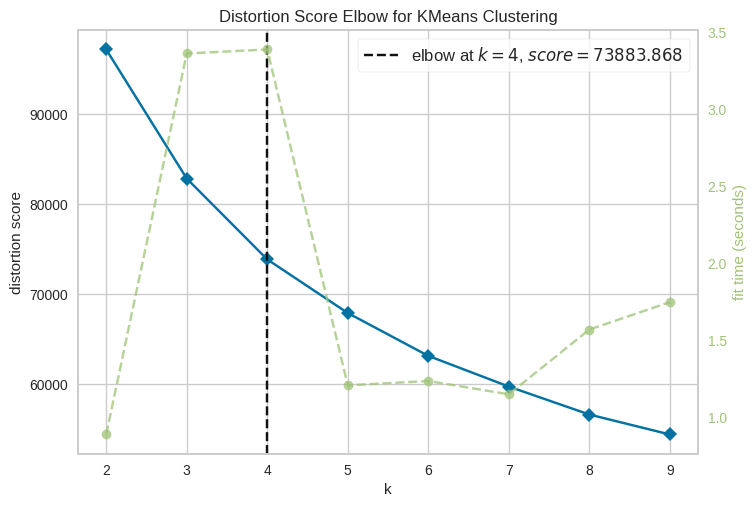

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [91]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualiser = KElbowVisualizer(km,k=(2,10),metric='distortion')
visualiser.fit((scaled))
visualiser.show()

In [104]:
km = KMeans(n_clusters=4,random_state=42)
km.fit(scaled)
print(km.labels_,"\n")
print(km.cluster_centers_,"\n")

[2 2 3 ... 2 1 2] 

[[-1.01960309e+00  2.63384128e-01 -9.17704342e-01 -9.18266880e-02
  -5.59880740e-01 -7.78828471e-01 -4.83378058e-01 -9.22106283e-01
   1.62561343e+00  1.96708972e-01  1.68871142e+00  8.20871779e-02
   1.01272669e+00]
 [-6.34142666e-01  1.02845221e+00 -1.03028889e+00 -1.38725182e+00
  -7.24395252e-04  4.54760602e-02  1.14658263e+00 -5.25258006e-02
   1.59741645e+00  1.45162296e-01  1.39044559e+00  2.01799486e-01
   2.11182519e+00]
 [ 3.10682744e-01 -8.45101222e-01  7.49414178e-01  7.84109511e-01
  -6.53635824e-02  6.73960798e-02 -3.43231171e-01 -1.11969536e-02
   1.73677996e+00  1.59343845e-01  2.23229877e+00  9.87525562e-01
   9.99591002e-01]
 [ 1.04643401e+00  2.98949159e-01  5.36992953e-01 -1.01764786e-01
   6.87941760e-01  6.65173530e-01  1.72407872e-01  1.01670359e+00
   1.73326215e+00  9.93467107e-02  1.98133223e+00  9.61652893e-01
   2.34446281e+00]] 



In [105]:
def cluster_plots(x_index: int, y_index: int, scaled_frame, km, rc=None):
    sns.set_theme(rc=rc, style='whitegrid', palette='bright')
    x_column_name = scaled_frame.columns[x_index]
    y_column_name = scaled_frame.columns[y_index]

    sns.scatterplot(x=scaled_frame.iloc[:, x_index], y=scaled_frame.iloc[:, y_index], hue=km.labels_, palette='bright')
    plt.scatter(km.cluster_centers_[:, x_index], km.cluster_centers_[:, y_index], marker='X', s=80, label="centroids", color='red')
    plt.xlabel(f"{x_column_name}")
    plt.ylabel(f"{y_column_name}")
    plt.title("Cluster plots")
    plt.legend()
    plt.show()

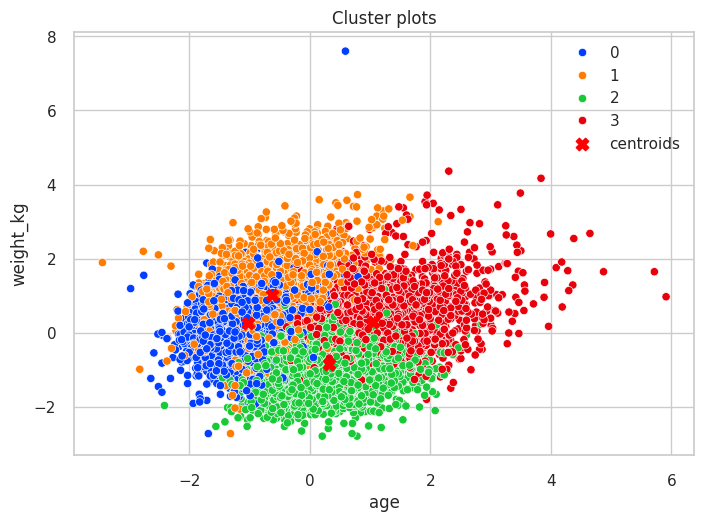

In [106]:
cluster_plots(0, 1, scaled_frame, km)